In [19]:

# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine Quality data set

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
X = df.iloc[: ,:13]
y = df['target']

column_names = df.columns
column_names = column_names.to_list()

In [20]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

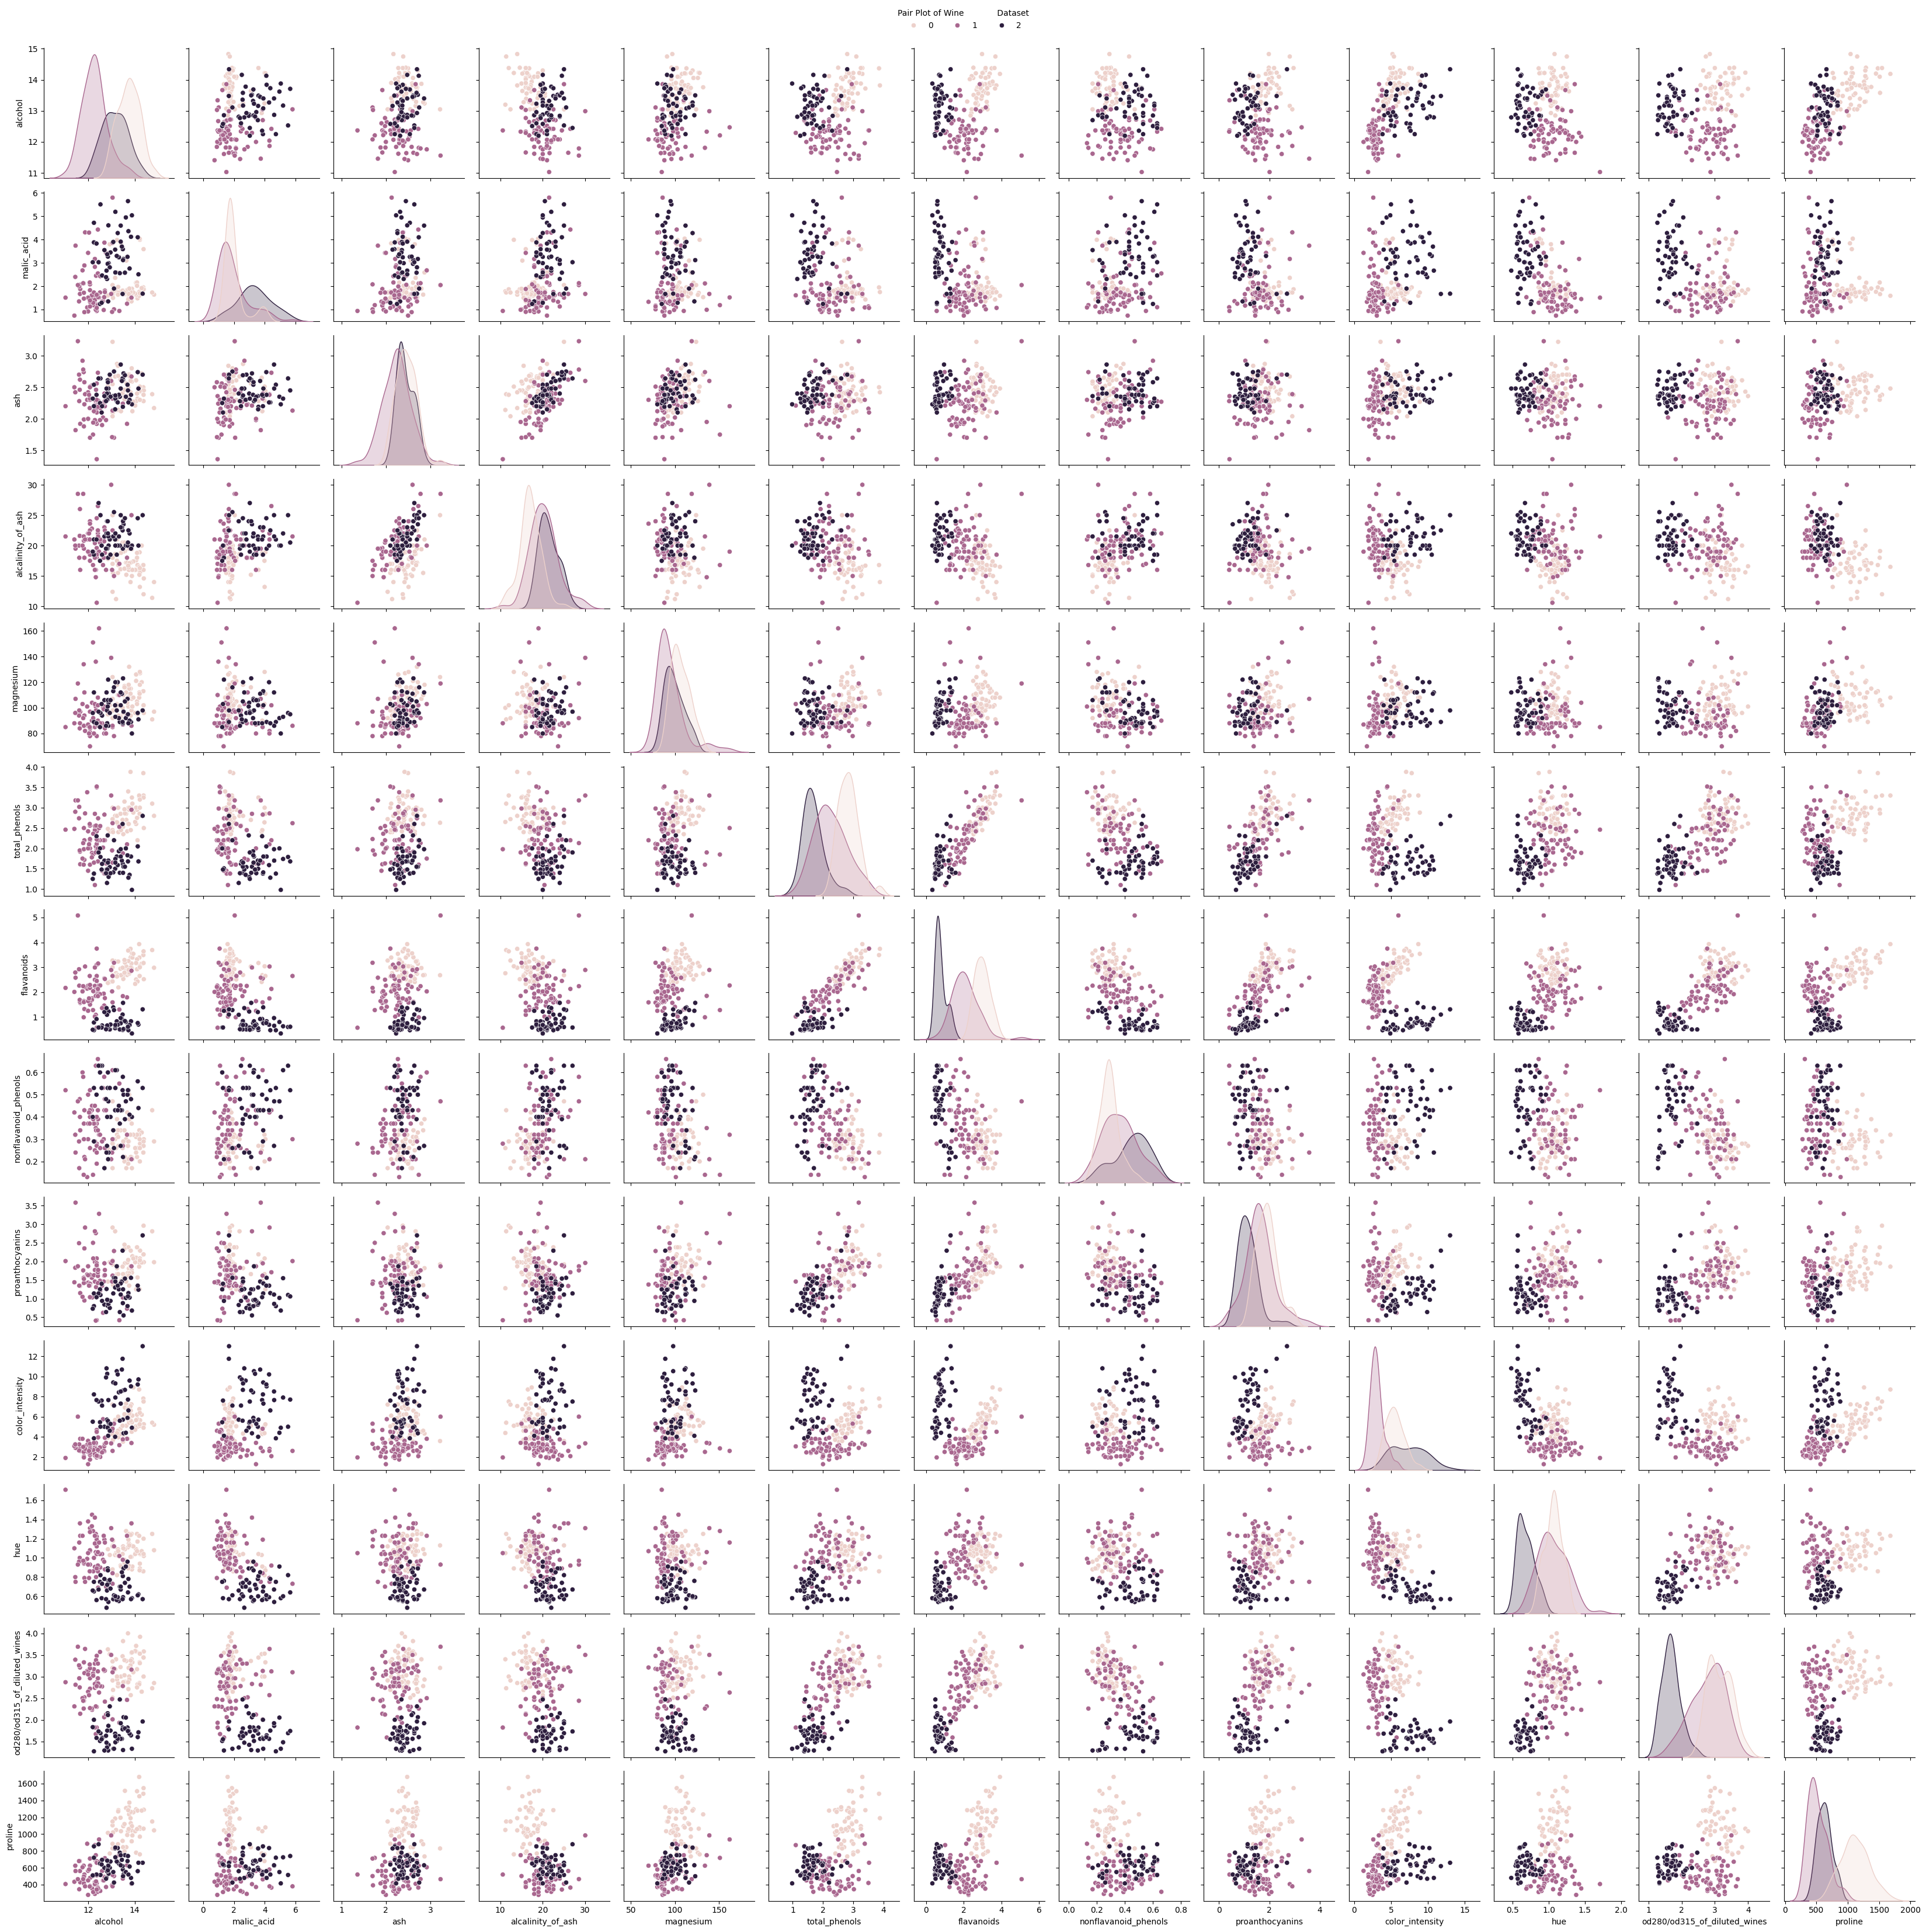

In [21]:
ax = sns.pairplot(df, hue='target')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title="Pair Plot of Wine             Dataset", frameon=False)

plt.tight_layout()
plt.show()

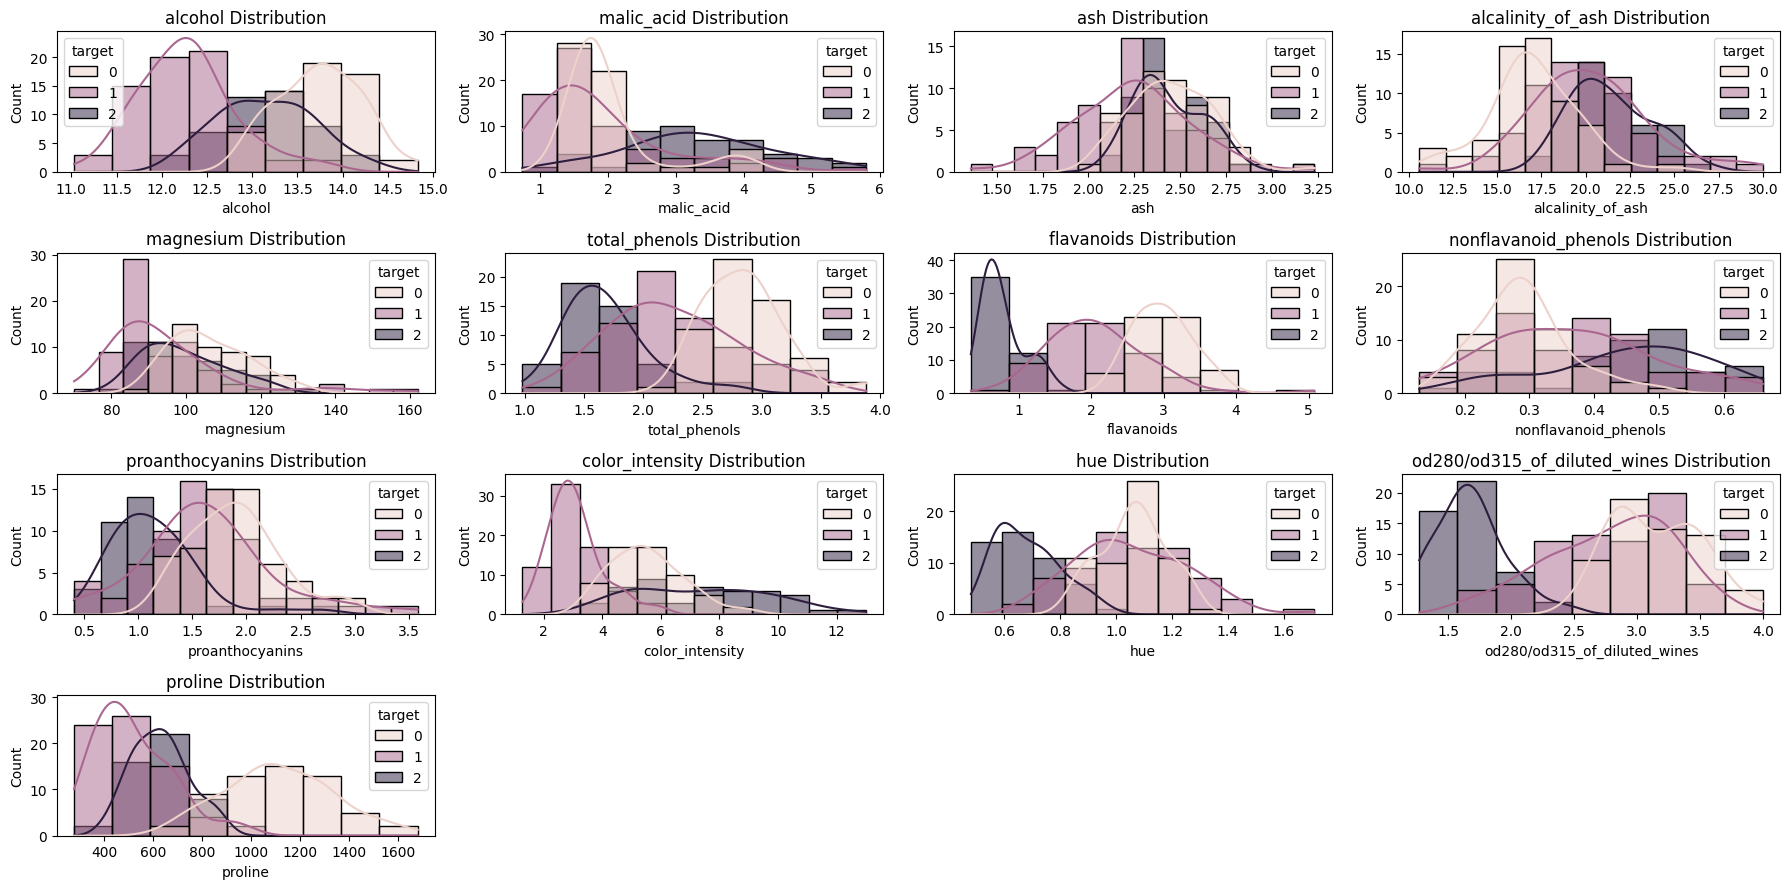

In [22]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(18, 9))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=feature, hue='target', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

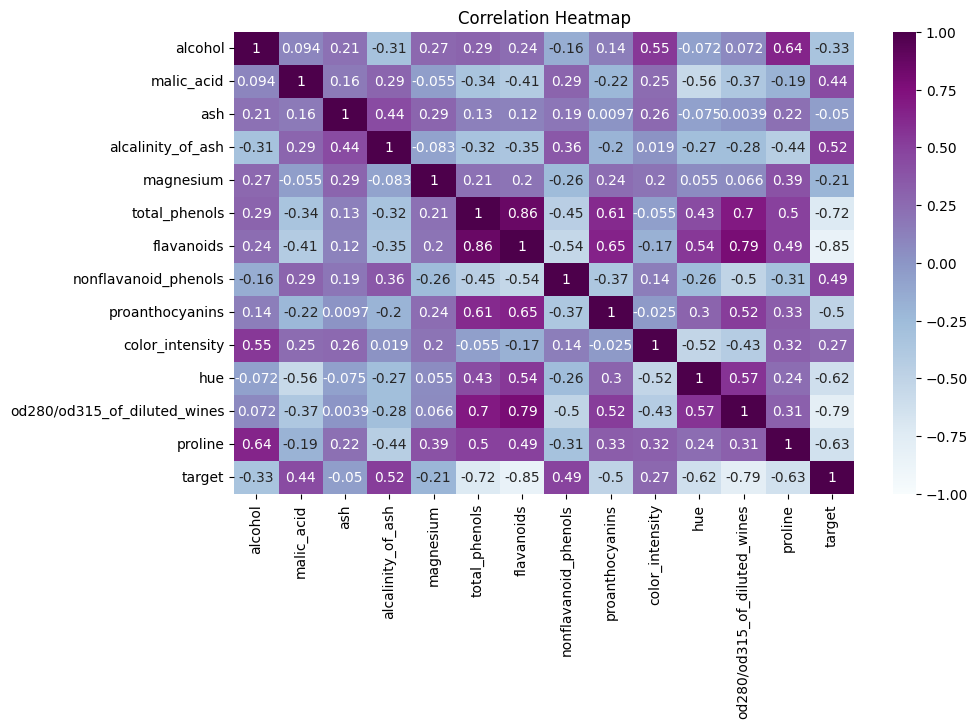

In [23]:
# Note issue with older version of seaborn: https://github.com/mwaskom/seaborn/issues/3478

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [25]:
#scaling and centering the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [27]:
X_train_scaled 

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [26]:
X_train

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
161    13.69        3.26  2.54               20.0      107.0           1.83   
92     12.69        1.53  2.26               20.7       80.0           1.38   
94     11.62        1.99  2.28               18.0       98.0           3.02   
174    13.40        3.91  2.48               23.0      102.0           1.80   
24     13.50        1.81  2.61               20.0       96.0           2.53   
..       ...         ...   ...                ...        ...            ...   
103    11.82        1.72  1.88               19.5       86.0           2.50   
67     12.37        1.17  1.92               19.6       78.0           2.11   
117    12.42        1.61  2.19               22.5      108.0           2.00   
47     13.90        1.68  2.12               16.0      101.0           3.10   
172    14.16        2.51  2.48               20.0       91.0           1.68   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
161        0.56                  0.50             0.80             5.88  0.96   
92         1.46                  0.58             1.62             3.05  0.96   
94         2.26                  0.17             1.35             3.25  1.16   
174        0.75                  0.43             1.41             7.30  0.70   
24         2.61                  0.28             1.66             3.52  1.12   
..          ...                   ...              ...              ...   ...   
103        1.64                  0.37             1.42             2.06  0.94   
67         2.00                  0.27             1.04             4.68  1.12   
117        2.09                  0.34             1.61             2.06  1.06   
47         3.39                  0.21             2.14             6.10  0.91   
172        0.70                  0.44             1.24             9.70  0.62   

     od280/od315_of_diluted_wines  proline  
161                          1.82    680.0  
92                           2.06    495.0  
94                           2.96    345.0  
174                          1.56    750.0  
24                           3.82    845.0  
..                            ...      ...  
103                          2.44    415.0  
67                           3.48    510.0  
117                          2.96    345.0  
47                           3.33    985.0  
172                          1.71    660.0  

[142 rows x 13 columns]

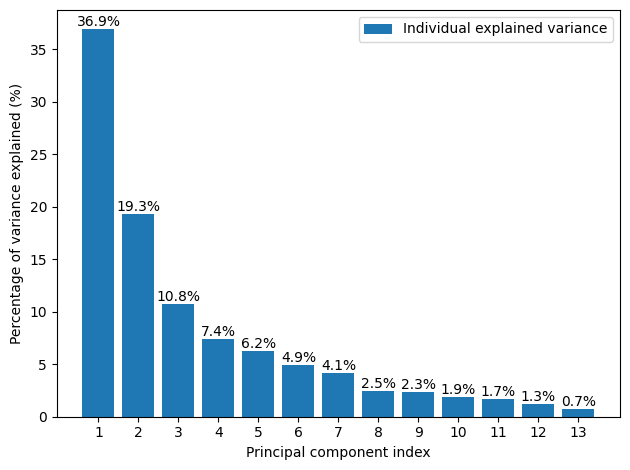

In [8]:
# calculate covariance matrix, eigenvalues and eigenvectors
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

exp_var = []

# Sort the eigenvalues in descending order
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

bar = plt.bar(range(1, 14), exp_var, align='center',
        label='Individual explained variance')

# Adding data labels to the top of bars 
for i, bar in enumerate(bar):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%', 
             ha='center', va='bottom')

plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 1.0, 'Scree Plot')

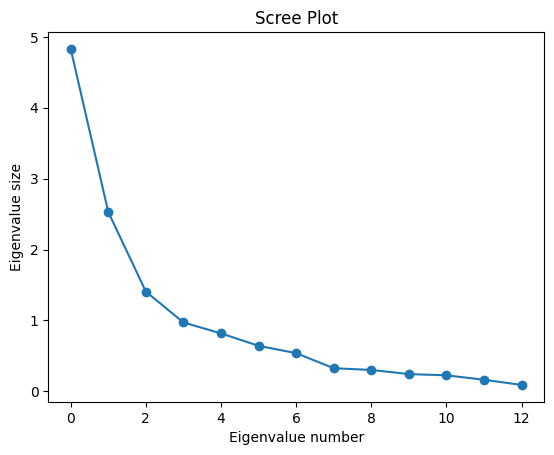

In [9]:
# generate scree plot
pca = PCA()
X_train = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df
final_pca_df['target'] = y_train

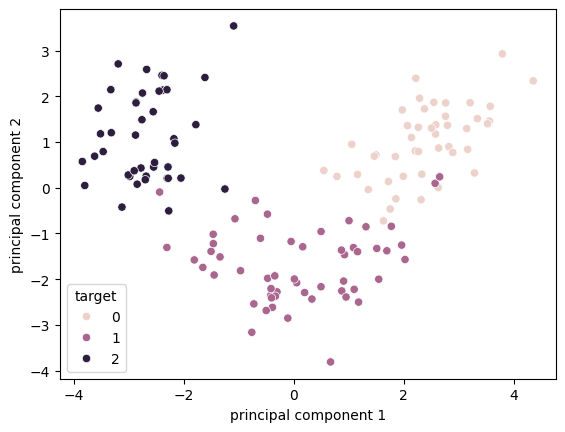

In [11]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
hue = 'target',
data=final_pca_df,
legend=True)
plt.show()